# Libraries use

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, make_scorer

# Import dataset

In [2]:
NASDAQ = pd.read_csv('C:/Users/Shourya/Desktop/dataset/ESCORTS dataset/dataset/NASDAQ.CSV')
NIFTY_50 = pd.read_csv('C:/Users/Shourya/Desktop/dataset/ESCORTS dataset/dataset/NIFTY 50.CSV')
Nikkei_225 = pd.read_csv('C:/Users/Shourya/Desktop/dataset/ESCORTS dataset/dataset/Nikkei 225.CSV')
Hang_Seng = pd.read_csv('C:/Users/Shourya/Desktop/dataset/ESCORTS dataset/dataset/HANG SENG.CSV')
es_train = pd.read_csv('C:/Users/Shourya/Desktop/dataset/ESCORTS dataset/dataset/ESCORTS.NS.CSV')


# Preprocessing

In [3]:
# NASDAQ.isna().sum()

In [4]:
print('NASDAQ',NASDAQ.isna().sum(),'\n\n\n','NIFTY_50',NIFTY_50.isna().sum(),'\n\n\n','es_train',es_train.isna().sum(),'\n\n\n',"Nikkei_225",Nikkei_225.isna().sum(),"\n\n\n","Hang_Seng",Hang_Seng.isna().sum())

NASDAQ Date        0
Open        1
High        0
Low         0
Close       0
AdjClose    0
Volume      0
dtype: int64 


 NIFTY_50 Date         0
Open        24
High        23
Low         23
Close       23
AdjClose    23
Volume      23
dtype: int64 


 es_train Date        0
Open        8
High        7
Low         7
Close       7
AdjClose    7
Volume      7
dtype: int64 


 Nikkei_225 Date         0
Open        21
High        20
Low         20
Close       20
AdjClose    20
Volume      20
dtype: int64 


 Hang_Seng Date         0
Open        12
High        11
Low         11
Close       11
AdjClose    11
Volume      11
dtype: int64


In [5]:
Hang_Seng[Hang_Seng['Open'].isnull()]
Nikkei_225[Nikkei_225['Open'].isnull()]
es_train[es_train['Open'].isna()]
NIFTY_50[NIFTY_50['Open'].isna()]

Date  Open          High           Low         Close  \
264   30-05-2011   NaN   5509.299805   5458.600098   5473.100098   
383   23-11-2011   NaN   4779.500000   4640.950195   4706.450195   
404   23-12-2011   NaN   4763.450195   4693.200195   4714.000000   
409   30-12-2011   NaN   4690.450195   4608.899902   4624.299805   
414   06-01-2012   NaN   4794.899902   4686.850098   4754.100098   
453   02-03-2012   NaN   5392.549805   5315.049805   5359.350098   
505   18-05-2012   NaN   4908.500000   4788.950195   4891.450195   
574   27-08-2012   NaN   5399.149902   5346.649902   5350.250000   
583   07-09-2012   NaN   5347.149902   5309.200195   5342.100098   
625   09-11-2012   NaN   5751.700195   5677.750000   5686.250000   
658   31-12-2012   NaN   5919.000000   5897.149902   5905.100098   
906   31-12-2013   NaN   6317.299805   6287.299805   6304.000000   
962   21-03-2014   NaN   6522.899902   6485.700195   6493.200195   
983   23-04-2014   NaN   6861.600098   6820.750000   6840.799805   
1100  14-10-2014   NaN   7928.000000   7825.450195   7864.000000   
1151  31-12-2014   NaN   8291.000000   8243.750000   8282.700195   
1191  27-02-2015   NaN   8856.950195   8717.450195   8844.599609   
1220  13-04-2015   NaN   8841.650391   8762.099609   8834.000000   
1398  31-12-2015   NaN   7955.549805   7891.149902   7946.350098   
1550  11-08-2016   NaN   8601.150391   8540.049805   8592.150391   
1892  29-12-2017   NaN  10538.700200  10488.650390  10530.700200   
2138  31-12-2018   NaN  10923.549810  10853.200200  10862.549810   
2336  25-10-2019   NaN  11646.900390  11490.750000  11583.900390   
2468  11-05-2020   NaN   9439.900391   9219.950195   9239.200195   

          AdjClose    Volume  
264    5473.100098       0.0  
383    4706.450195       0.0  
404    4714.000000       0.0  
409    4624.299805       0.0  
414    4754.100098       0.0  
453    5359.350098       0.0  
505    4891.450195       0.0  
574    5350.250000       0.0  
583    5342.100098       0.0  
625    5686.250000       0.0  
658    5905.100098       0.0  
906    6304.000000  103400.0  
962    6493.200195  189900.0  
983    6840.799805  183000.0  
1100   7864.000000  225500.0  
1151   8282.700195   84500.0  
1191   8844.599609  249500.0  
1220   8834.000000  121600.0  
1398   7946.350098  150900.0  
1550   8592.150391  189200.0  
1892  10530.700200  152000.0  
2138  10862.549810  180900.0  
2336  11583.900390     800.0  
2468   9239.200195  704600.0

In [6]:
Hang_Seng.dropna(axis=0,inplace=True)
Nikkei_225.dropna(axis=0,inplace=True)
es_train.dropna(axis=0,inplace=True)
NIFTY_50.dropna(axis=0,inplace=True)
NASDAQ.dropna(axis=0,inplace=True)

In [7]:
print('NASDAQ',NASDAQ.isna().sum(),'\n\n\n','NIFTY_50',NIFTY_50.isna().sum(),'\n\n\n','es_train',es_train.isna().sum(),'\n\n\n',"Nikkei_225",Nikkei_225.isna().sum(),"\n\n\n","Hang_Seng",Hang_Seng.isna().sum())

NASDAQ Date        0
Open        0
High        0
Low         0
Close       0
AdjClose    0
Volume      0
dtype: int64 


 NIFTY_50 Date        0
Open        0
High        0
Low         0
Close       0
AdjClose    0
Volume      0
dtype: int64 


 es_train Date        0
Open        0
High        0
Low         0
Close       0
AdjClose    0
Volume      0
dtype: int64 


 Nikkei_225 Date        0
Open        0
High        0
Low         0
Close       0
AdjClose    0
Volume      0
dtype: int64 


 Hang_Seng Date        0
Open        0
High        0
Low         0
Close       0
AdjClose    0
Volume      0
dtype: int64


In [8]:
Hang_Seng.head()

Date         Open         High          Low        Close  \
0  12-05-2010  20411.55078  20237.85938  20003.49023  20212.49023   
1  13-05-2010  20258.44922  20526.58008  20273.99023  20422.46094   
2  14-05-2010  19832.02930  20352.80078  20130.77930  20145.42969   
3  17-05-2010  19768.80078  19832.02930  19593.50000  19715.19922   
4  18-05-2010  19552.16016  20013.33008  19672.39063  19944.93945   

      AdjClose        Volume  
0  20212.49023  1.157922e+09  
1  20422.46094  1.340553e+09  
2  20145.42969  1.366467e+09  
3  19715.19922  1.728648e+09  
4  19944.93945  1.350109e+09

# Analysis of data and find out important factors

Text(0.5, 1.0, 'Closing price')

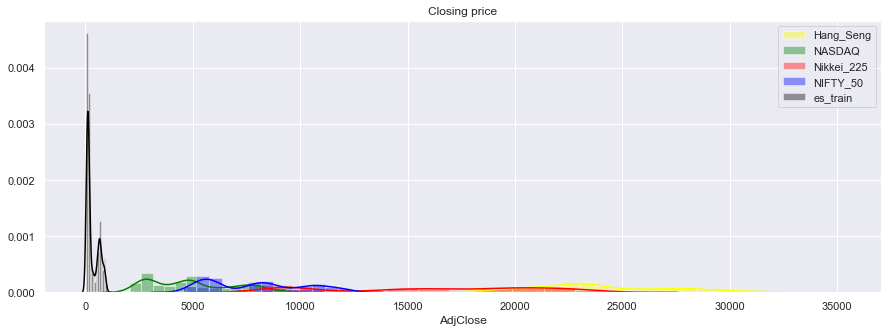

In [9]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set(style="darkgrid")

sns.distplot(Hang_Seng.AdjClose,color='yellow',label='Hang_Seng')
sns.distplot(NASDAQ.AdjClose,color='green',label='NASDAQ')
sns.distplot(Nikkei_225.AdjClose,color='red',label='Nikkei_225')
sns.distplot(NIFTY_50.AdjClose,color='blue',label='NIFTY_50')
sns.distplot(es_train.AdjClose,color='black',label='es_train')
plt.legend(loc='upper right')
plt.title('Closing price')

Text(0.5, 1.0, 'Open price')

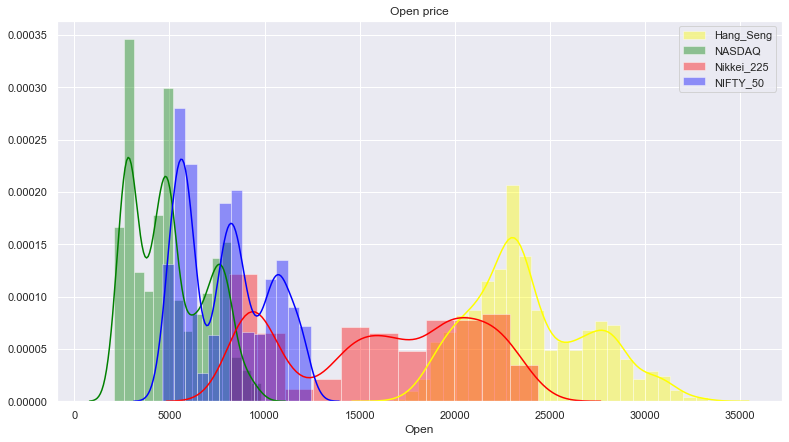

In [10]:
sns.set(rc={'figure.figsize':(13,7)})
sns.set(style="darkgrid")

sns.distplot(Hang_Seng.Open,color='yellow',label='Hang_Seng')
sns.distplot(NASDAQ.Open,color='green',label='NASDAQ')
sns.distplot(Nikkei_225.Open,color='red',label='Nikkei_225')
sns.distplot(NIFTY_50.Open,color='blue',label='NIFTY_50')
plt.legend(loc='upper right')
plt.title('Open price')

Text(0.5, 1.0, 'Regression plot')

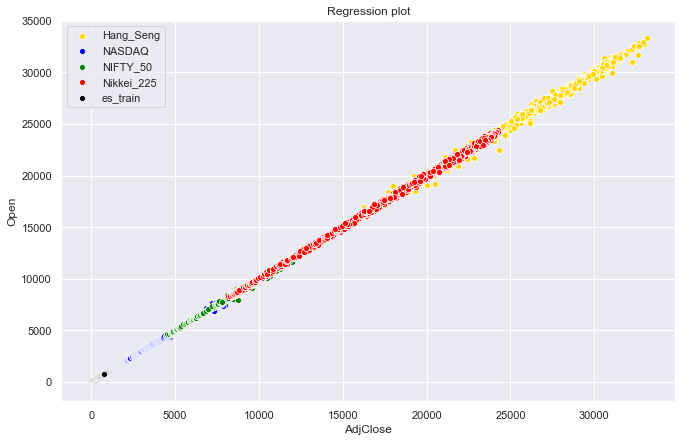

In [11]:
sns.set(rc={'figure.figsize':(11,7)})
sns.scatterplot(Hang_Seng.AdjClose,Hang_Seng.Open,color='gold',label='Hang_Seng')
sns.scatterplot(NASDAQ.AdjClose,NASDAQ.Open,color='blue',label='NASDAQ')
sns.scatterplot(NIFTY_50.AdjClose,NIFTY_50.Open,color='green',label='NIFTY_50')
sns.scatterplot(Nikkei_225.AdjClose,Nikkei_225.Open,color='red',label='Nikkei_225')
sns.scatterplot(es_train.AdjClose,es_train.Open,color='black',label='es_train')
plt.legend(loc='upper left')
plt.title('Regression plot')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


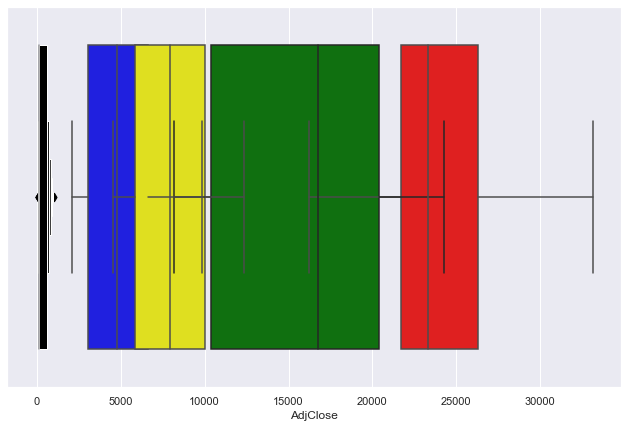

In [12]:
#checking outliers

sns.boxplot(Hang_Seng.AdjClose,color='red')
sns.boxplot(Nikkei_225.AdjClose,color='green')
sns.boxplot(NASDAQ.AdjClose,color='blue')
sns.boxplot(NIFTY_50.AdjClose,color='yellow')
sns.boxenplot(es_train.AdjClose,color='black')

## as we can see in box plot their is no any outliers present in all dataset

In [13]:
# rename of columns
Hang_Seng=Hang_Seng.rename(columns={'AdjClose': 'Hang_Seng_AdjClose'})
Hang_Seng=Hang_Seng.rename(columns={'Open': 'Hang_Seng_Open'})
NASDAQ=NASDAQ.rename(columns={'AdjClose': 'NASDAQ_AdjClose'})
NASDAQ=NASDAQ.rename(columns={'Open': 'NASDAQ_Open'})
Nikkei_225=Nikkei_225.rename(columns={'AdjClose': 'Nikkei_225_AdjClose'})
Nikkei_225=Nikkei_225.rename(columns={'Open': 'Nikkei_225_Open'})
NIFTY_50=NIFTY_50.rename(columns={'AdjClose': 'NIFTY_50_AdjClose'})
NIFTY_50=NIFTY_50.rename(columns={'Open': 'NIFTY_50_Open'})
es_train=es_train.rename(columns={'AdjClose': 'es_train_AdjClose'})
es_train=es_train.rename(columns={'Open': 'es_train_Open'})


In [14]:
# # splitting data
df1 = Hang_Seng[['Date','Hang_Seng_AdjClose','Hang_Seng_Open']]
df2 = NASDAQ[['Date','NASDAQ_AdjClose','NASDAQ_Open']]
df3 = Nikkei_225[['Date','Nikkei_225_AdjClose','Nikkei_225_Open']]
df4 = NIFTY_50[['Date','NIFTY_50_AdjClose','NIFTY_50_Open']]
df5 = es_train[['Date','es_train_AdjClose','es_train_Open']]

# Merging data

In [15]:
# es_train_X = es_train.drop(['Stock Open price'],axis=1)
# es_train_Y = es_train.drop(['AdjClose','Volume','NIFTY Open'],axis=1)

In [16]:
tb1 = pd.merge(df1,df2,how='inner',on='Date')
tb1 = pd.merge(tb1,df3,how='inner',on='Date')
tb1 = pd.merge(tb1,df4,how='inner',on='Date')
tb1 = pd.merge(tb1,df5,how='inner',on='Date')

In [17]:
tb1.tail()

Date  Hang_Seng_AdjClose  Hang_Seng_Open  NASDAQ_AdjClose  \
2095  24-04-2020         23831.33008     24030.66016      8634.519531   
2096  27-04-2020         24280.14063     24401.11914      8730.160156   
2097  28-04-2020         24575.96094     24786.01953      8607.730469   
2098  07-05-2020         23980.63086     24193.35938      8979.660156   
2099  08-05-2020         24230.16992     24470.17969      9121.320313   

      NASDAQ_Open  Nikkei_225_AdjClose  Nikkei_225_Open  NIFTY_50_AdjClose  \
2095  8717.980469          19262.00000      19410.83984        9154.400391   
2096  8825.690430          19783.22070      19776.17969        9282.299805   
2097  8802.700195          19771.18945      20105.67969        9380.900391   
2098  9056.889648          19674.76953      19972.08984        9199.049805   
2099  9054.910156          20179.08984      20333.73047        9251.500000   

      NIFTY_50_Open  es_train_AdjClose  es_train_Open  
2095    9259.700195         717.000000     731.000000  
2096    9389.799805         709.099976     713.799988  
2097    9408.599609         709.150024     715.000000  
2098    9376.950195         750.150024     757.500000  
2099    9348.150391         740.349976     747.349976

In [18]:
tb1.shape

(2100, 11)

In [19]:
tb1.corr().style.background_gradient(cmap="Reds")

In [20]:
tb1=tb1.drop(['Date'],axis=1)

In [21]:
tb1 = pd.DataFrame(tb1)
tb1.head()

Hang_Seng_AdjClose  Hang_Seng_Open  NASDAQ_AdjClose  NASDAQ_Open  \
0         20212.49023     20411.55078      2425.020020  2416.360107   
1         20422.46094     20258.44922      2394.360107  2373.879883   
2         20145.42969     19832.02930      2346.850098  2352.770020   
3         19715.19922     19768.80078      2354.229980  2372.840088   
4         19944.93945     19552.16016      2317.260010  2307.780029   

   Nikkei_225_AdjClose  Nikkei_225_Open  NIFTY_50_AdjClose  NIFTY_50_Open  \
0          10394.03027      10542.76953        5156.649902    5157.549805   
1          10620.54981      10453.40039        5178.899902    5180.549805   
2          10462.50977      10329.37012        5093.500000    5093.899902   
3          10235.75977      10313.13965        5059.899902    5059.549805   
4          10242.63965      10087.33008        5066.200195    5065.100098   

   es_train_AdjClose  es_train_Open  
0         175.531219     190.100006  
1         178.270325     193.600006  
2         173.294266     183.600006  
3         173.431229     190.000000  
4         167.953003     173.149994

In [22]:
# from sklearn.preprocessing import MinMaxScaler


In [294]:
X = tb1[tb1.columns[:-1]]
Y = tb1[tb1.columns[-1]]

# XX = StandardScaler()
# X = XX.fit_transform(X)
# X = pd.DataFrame(X)


# Y = pd.DataFrame(Y)
# YY = StandardScaler()
# Y = YY.fit_transform(Y)
# Y = pd.DataFrame(Y)

train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size=0.25, random_state=38)

# GradientBoostingRegressor

In [295]:
# learn_rates = [0.1, 0.5]
# max_depths = [20]
# min_samples_leaf = [5,20]
# min_samples_split = [5,20]
# n_estimators = [200]
# tol = [0.001]

# param_grid = {'tol': tol,
#               'n_estimators': n_estimators,
#               'learning_rate': learn_rates,
#               'max_depth': max_depths,
#               'min_samples_leaf': min_samples_leaf,
#               'min_samples_split': min_samples_split}
# gbr_model = GridSearchCV(GradientBoostingRegressor(loss='huber'),param_grid, cv=4, return_train_score=True)

In [296]:
# gbr_model.fit(train_x,train_y)

In [297]:
# gbr_prd=gbr_model.predict(test_x)
# # Mean squared error regression loss
# print(mean_squared_error(test_y,gbr_prd,squared=True))
# # make_scorer(mean_squared_error)

In [298]:
# dataframe = pd.concat([dfx,dfy],axis=1,sort=False)
# Hang_Seng=Hang_Seng.rename(columns={'AdjClose': 'Hang_Seng_AdjClose'})
# dataframe = dataframe.rename(columns={'Stock Open price':'Actual price'})
# dataframe['Predicted Open'] = gbr_model.predict(dfx)
# dataframe.head()

# Linear regression 

In [299]:

parameters = {'fit_intercept':['True'], 
              'normalize':['True'], 
              'copy_X':('True', 'False')}

lr = LinearRegression()              
lr_model = GridSearchCV(lr, parameters)

In [300]:
# from sklearn.model_selection import cross_val_score
# print(cross_val_score(lr_model, X,Y, cv=10,scoring='accuracy',).mean())

In [301]:
# lr_model.fit(train_x,train_y)
lr_model.fit(train_x,train_y)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': ('True', 'False'), 'fit_intercept': ['True'],
                         'normalize': ['True']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [307]:
from joblib import dump, load
dump(lr_model, 'real_data.joblib')

['real_data.joblib']

In [303]:
realtest_x = {'Hang_Seng_AdjClose':['24245.68','24180.30','23829.74','23797.47'] ,'Hang_Seng_Open':['24111.67','24038.07','23834.68','23736.67'],
              'NASDAQ_AdjClose':['9192.34','9002.55','8863.17','8943.72'],'NASDAQ_Open':['9225.15','9006.05','8788.04','8839.99'],
              'Nikkei_225_AdjClose':['20366.48','20267.05','19914.78','20037.47'],'Nikkei_225_Open':['20140.92','20140.49','20149.79','20097.62'],
              'NIFTY_50_AdjClose':['9196.55','9383.55','9142.75','9136.85'],'NIFTY_50_Open':['9584.20','9213.95','9182.40','9158.30'],
              'es_train_AdjClose':['765.15','812.25','794.30','823.55'] }

es_train_Open = {'Actual Price': ['824']}
# dfx= pd.DataFrame(realtest_x)
# dfy = pd.DataFrame(es_train_Open)
# dfx.head()
# lr_prd=lr_model.predict(dfx)

In [304]:
realtest_x = pd.DataFrame(realtest_x)
realtest_x

Hang_Seng_AdjClose Hang_Seng_Open NASDAQ_AdjClose NASDAQ_Open  \
0           24245.68       24111.67         9192.34     9225.15   
1           24180.30       24038.07         9002.55     9006.05   
2           23829.74       23834.68         8863.17     8788.04   
3           23797.47       23736.67         8943.72     8839.99   

  Nikkei_225_AdjClose Nikkei_225_Open NIFTY_50_AdjClose NIFTY_50_Open  \
0            20366.48        20140.92           9196.55       9584.20   
1            20267.05        20140.49           9383.55       9213.95   
2            19914.78        20149.79           9142.75       9182.40   
3            20037.47        20097.62           9136.85       9158.30   

  es_train_AdjClose  
0            765.15  
1            812.25  
2            794.30  
3            823.55

In [305]:
lr_model.predict(realtest_x)

array([782.81101174, 794.25301783, 790.12952282, 818.40312662])

In [306]:
# lr_model.predict(dfx)
lr_prd=lr_model.predict(test_x)
mean_squared_error(test_y,lr_prd,squared=True)

22.40776757368281

In [31]:
test_y = pd.DataFrame(test_y)
test_y['predict_value'] = lr_model.predict(test_x)
test_y.head()
# minmax.inverse_transform(test_y[['predict_value']])

9  predict_value
1034  0.092442       0.091283
1176  0.117281       0.113915
67    0.151641       0.148715
1330  0.294612       0.294938
650   0.023988       0.028722

In [34]:
# from joblib import dump, load
# dump(lr_model, 'final.joblib')

In [35]:
#load data
# app = load('Stock_prd.joblib')

In [36]:
# app.predict(dfx)

In [37]:
lr_prd=lr_model.predict(dfx)
mean_squared_error(dfy,lr_prd,squared=True)

23276872863.79773

# Support Vector Regressor

In [40]:
# scorer = make_scorer(mean_squared_error, greater_is_better=False)
# parameters = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}]
# svr_gs = GridSearchCV(SVR(epsilon = 0.01), parameters, cv = 5, scoring=scorer)

# svr_model = SVR(svr_gs)
# svr_model.fit(train_x,train_y)
# svr_prd=svr_model.predict(test_x)
# mean_squared_error(test_y,svr_prd,squared=True)